<a href="https://colab.research.google.com/github/Ananya9304/CODSOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
train_path='/content/train_data.txt'
train_data=pd.read_csv( train_path , sep=':::',engine='python',names=['Movie','Genre','Description'])

In [3]:
test_path='/content/test_data_solution.txt'
test_data=pd.read_csv( test_path , sep=':::',engine='python',names=['Movie', 'Genre','Description'])

In [4]:
train_data.head()

,Movie,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
test_data.head()

,Movie,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
y_train = train_data['Genre']


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_train_pred = nb_classifier.predict(X_train_tfidf)


print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred,zero_division=0))

Accuracy on training set: 0.4959042218021424
Classification Report on training set:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       190
       adult        0.00      0.00      0.00        96
   adventure        0.00      0.00      0.00       111
   animation        0.00      0.00      0.00        72
   biography        0.00      0.00      0.00        44
      comedy        0.74      0.33      0.46      1081
       crime        0.00      0.00      0.00        63
 documentary        0.57      0.92      0.71      1924
       drama        0.41      0.90      0.57      1967
      family        0.00      0.00      0.00       114
     fantasy        0.00      0.00      0.00        50
   game-show        0.00      0.00      0.00        31
     history        0.00      0.00      0.00        39
      horror        1.00      0.01      0.02       319
       music        0.00      0.00      0.00       105
     musical        0.00      0.00

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['Description'])

In [9]:
X_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [10]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

                                                  Movie          Genre  \
1                                 Edgar's Lunch (1998)       thriller    
2                             La guerra de papá (1977)         comedy    
3                          Off the Beaten Track (2010)    documentary    
4                               Meu Amigo Hindu (2015)          drama    
5                                    Er nu zhai (1955)          drama    
...                                                 ...            ...   
4813                         The Westward Trail (1948)        western    
4814                      Napapiirin sankarit 3 (2017)         comedy    
4815                            Bomba u 10 i 10 (1967)            war    
4816   Everything's Bigger: Adam Pacitti's Accidenta...   documentary    
4817                           "For the Record" (2017)           news    

                                            Description Predicted_Genre  
1      L.R. Brane loves his life - hi

There are movies of 27 genres in the database
Genre
drama           1967
documentary     1924
comedy          1081
short            741
horror           319
thriller         271
action           190
western          153
reality-tv       129
family           114
adventure        111
music            105
sci-fi            97
adult             96
romance           85
animation         72
sport             64
crime             63
talk-show         58
fantasy           50
mystery           49
biography         44
history           39
musical           39
game-show         31
news              23
war               20
Name: count, dtype: int64


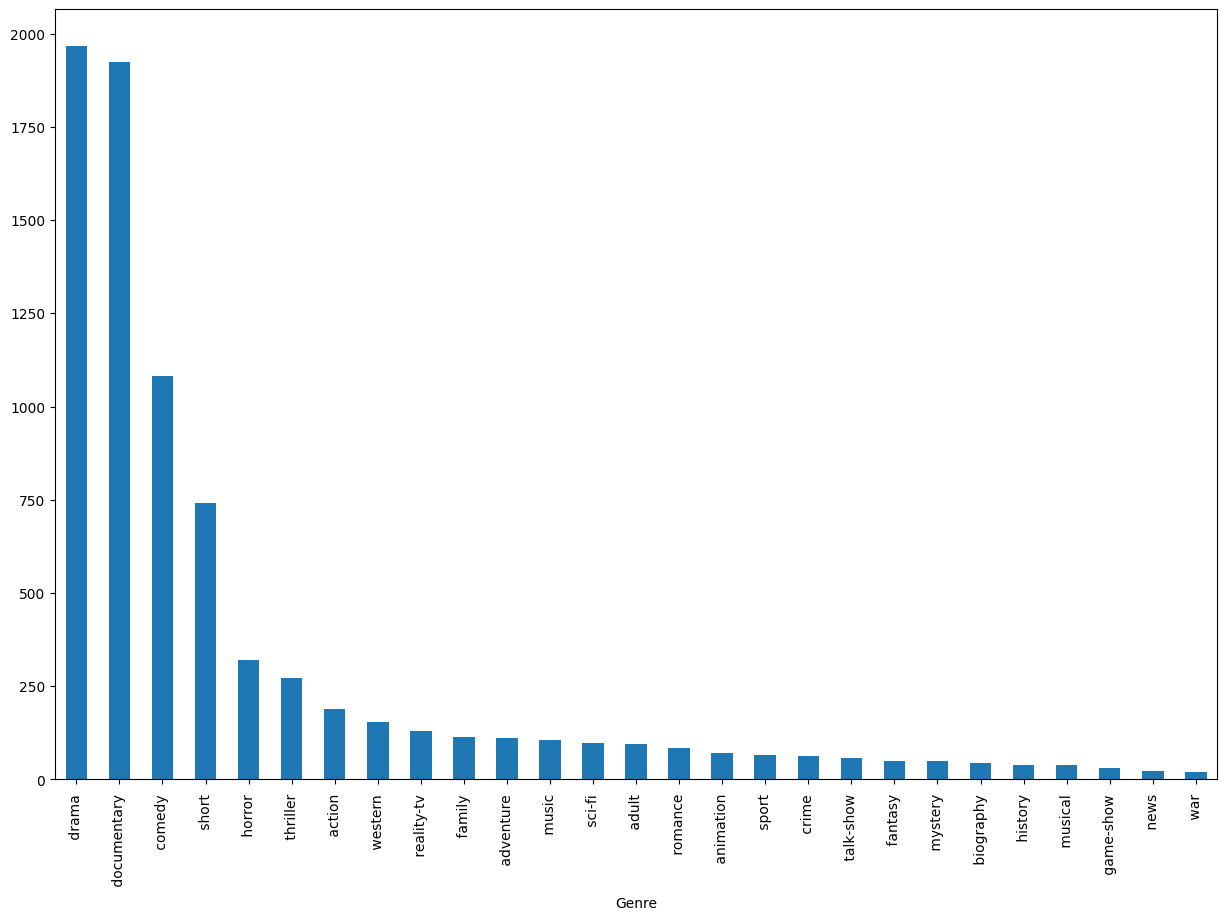

In [11]:
print("There are movies of {} genres in the database".format(train_data.loc[:,"Genre"].nunique()))
plt.figure(figsize=(15,10))
train_data.loc[:,"Genre"].value_counts().plot.bar()
print(train_data.Genre.value_counts())